In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('FinalLoanData.csv')
df

,Unnamed: 0,Meets Credit Policy?,Interest Rate (%),Log Annual Income ($),FICO Score,Revolving Balance ($),Revolving Line Utilisation Rate,No. of Overdue Payments,No. of Derogatory Public Records,Loan Not Fully Paid
0,0,1,11.89,11.35,737,28854,52.1,0,0,0
1,1,1,10.71,11.08,707,33623,76.7,0,0,0
2,2,1,13.57,10.37,682,3511,25.6,0,0,0
3,3,1,10.08,11.35,712,33667,73.2,0,0,0
4,4,1,14.26,11.30,667,4740,39.5,1,0,0
...,...,...,...,...,...,...,...,...,...,...
9573,9573,0,14.61,12.18,672,215372,82.1,0,0,1
9574,9574,0,12.53,11.14,722,184,1.1,0,0,1
9575,9575,0,10.71,10.60,687,10036,82.9,0,0,1
9576,9576,0,16.00,10.82,692,0,3.2,0,0,1


In [3]:
df.columns = ['Delete', 'Meets Credit Policy?', 'Interest Rate (%)', 'Log Annual Income ($)', 'FICO Score', 'Revolving Balance ($)', 'Revolving Line Utilisation Rate', 'No. of Overdue Payments', 'No. of Derogatory Public Records', 'LoanNotFullyPaid']

In [4]:
#df = df.loc[(df['Meets Credit Policy?'] == 0) & (df['FICO Score'] < 700)]

In [5]:
del df['Delete']

In [6]:
df.LoanNotFullyPaid.value_counts()

0    8045
1    1533
Name: LoanNotFullyPaid, dtype: int64

In [7]:
#del df['Meets Credit Policy?']

In [8]:
data = df[['Interest Rate (%)', 'Log Annual Income ($)', 'FICO Score', 'Revolving Balance ($)', 'Revolving Line Utilisation Rate', 'No. of Overdue Payments', 'No. of Derogatory Public Records']]
target = df[['LoanNotFullyPaid']]  

In [9]:
data = data.to_numpy()
target = target.to_numpy()

In [10]:
X = data
y = target
y.shape = (9578,)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [28]:
from sklearn.tree import DecisionTreeClassifier
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)
model = DecisionTreeClassifier(max_depth = 10)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
print("{0} / {1} correct".format(np.sum(ytest == ypred), len(ytest)))

1965 / 2395 correct


In [29]:
metrics.accuracy_score(ytest, ypred)

0.8204592901878914

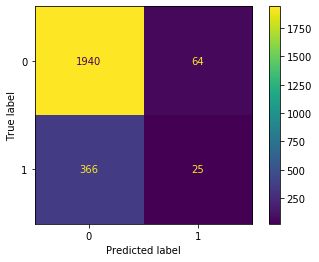

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay
matrix = confusion_matrix(ytest, ypred, labels=model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=model.classes_)
display.plot()

In [31]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred, labels=model.classes_))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      2004
           1       0.28      0.06      0.10       391

    accuracy                           0.82      2395
   macro avg       0.56      0.52      0.50      2395
weighted avg       0.75      0.82      0.77      2395



In [16]:
print(X)
print(y)

[[ 11.89  11.35 737.   ...  52.1    0.     0.  ]
 [ 10.71  11.08 707.   ...  76.7    0.     0.  ]
 [ 13.57  10.37 682.   ...  25.6    0.     0.  ]
 ...
 [ 10.71  10.6  687.   ...  82.9    0.     0.  ]
 [ 16.    10.82 692.   ...   3.2    0.     0.  ]
 [ 13.92  11.26 732.   ...  57.     0.     0.  ]]
[0 0 0 ... 1 1 1]


In [36]:
from sklearn.ensemble import RandomForestClassifier
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
print("{0} / {1} correct".format(np.sum(ytest == ypred), len(ytest)))

2016 / 2395 correct


In [37]:
metrics.accuracy_score(ytest, ypred)

0.8417536534446765

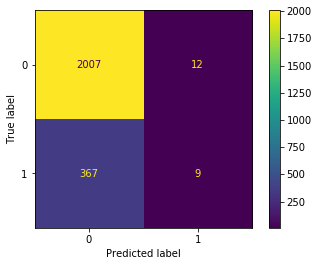

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay
matrix = confusion_matrix(ytest, ypred, labels=model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=model.classes_)
display.plot()

In [35]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred, labels=model.classes_))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90      1976
           1       0.42      0.03      0.05       419

    accuracy                           0.82      2395
   macro avg       0.63      0.51      0.48      2395
weighted avg       0.76      0.82      0.75      2395



In [ ]:
# Although both perform badly, decision tree actually performs better than random forest with many decision trees